In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 8 # batch size

In [ ]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 99.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/master_course/Ethnic_Group_Recognizer

/content/drive/MyDrive/master_course/Ethnic_Group_Recognizer


In [ ]:
doc(search_images_ddg)

In [ ]:
ethnic_group_labels = [
  "Akha people",
  "Bai people",
  "Chakma people",
  "Hani people",
  "Kazakhs",
  "Lisu people",
  "Mon people",
  "Naga people",
  "Qiang people",
  "Tatar people",
  "Tripuri people",
  "Uzbeks"
]
len(ethnic_group_labels)

12

In [ ]:
images = search_images_ddg(ethnic_group_labels[0])
f"No of Images => {len(images)} -- One Image URL => {images[0]}"

'No of Images => 200 -- One Image URL => https://i.pinimg.com/originals/fd/87/d3/fd87d3445384ccbe8a6831867610ef61.jpg'

In [ ]:
doc(download_url)

In [ ]:
dest = "Naga people.jpg"
download_url(images[0], dest, show_progress=False)

Path('Naga people.jpg')

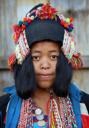

In [ ]:
image = Image.open(dest)
image.to_thumb(128, 128)

In [ ]:
data_path = "data"
if not os.path.exists(data_path):
  os.mkdir(data_path)

for cap_type in ethnic_group_labels:

  dest = f"{data_path}/{cap_type}"
  if not os.path.exists(dest):
    os.mkdir(dest)

  try:
    ethnic_people_image_urls = search_images_ddg(cap_type)
    download_images(dest, urls = ethnic_people_image_urls)

  except:
    continue

In [ ]:
image_counts = get_image_files(data_path)
image_counts

(#2287) [Path('data/Akha people/7758804d-f95b-4877-89fc-58741eae635a.jpg'),Path('data/Akha people/3bad5386-92fd-429e-bc03-190637856875.jpg'),Path('data/Akha people/be117bf4-8d7c-4836-81cf-76d7a31ebd23.jpg'),Path('data/Akha people/6e383cd5-1405-40bc-8a2d-1f2b647ded5d.jpg'),Path('data/Akha people/a9c5aabf-f0bc-4c9c-adff-252748f5a949.jpg'),Path('data/Akha people/9394aea2-4753-46b0-a412-72c5ba6caf99.jpg'),Path('data/Akha people/04d77c99-f735-4172-a17b-bf4992bc5a17.jpg'),Path('data/Akha people/ffa3f1f7-d10b-42f2-9a6d-b60e8d2ba8fc.jpg'),Path('data/Akha people/207af7f6-488c-478e-9392-bc259a0e7315.jpg'),Path('data/Akha people/598e9ea9-cfaf-4ed3-9b9b-15f0c2afe269.jpg')...]

In [ ]:
failed = verify_images(image_counts)
failed

(#51) [Path('data/Akha people/d99c882c-6e08-41a2-953b-eb547d22277f.jpg'),Path('data/Akha people/97580822-00b2-4c94-954c-df27fa92af6c.jpg'),Path('data/Akha people/3846b686-8b5a-487f-969e-a2e58abacee8.jpg'),Path('data/Bai people/3db8c87e-e0e6-45de-9026-ce574886f2df.jpg'),Path('data/Bai people/082bac7c-dc31-457f-ac39-8149dea4a801.jpg'),Path('data/Bai people/42880f3a-5e41-4f9f-8596-3bf826a3508f.jpg'),Path('data/Chakma people/ffb4d367-4e37-4e8e-9261-ce0eb394a067.jpeg'),Path('data/Hani people/a710ab51-bf4a-4331-a122-630b6068ac59.jpg'),Path('data/Hani people/1008525b-3eef-4742-8cbd-c77245b131e9.jpg'),Path('data/Kazakhs/d3230f00-73f3-470f-bd8e-e41f913ce944.jpg')...]

In [ ]:
failed.map(Path.unlink)

(#51) [None,None,None,None,None,None,None,None,None,None...]

In [ ]:
doc(get_image_files)

In [ ]:
dblock = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter = RandomSplitter(valid_pct = 0.1, seed = 15),  # getting 90-10 train-validation split
    get_y = parent_label,                               # taking the folder name as labels
    item_tfms = Resize(128))                            # resizing to get the image of same shape



In [ ]:
dls = dblock.dataloaders(data_path,bs=bs) # setting up batch size for efficient GPU use

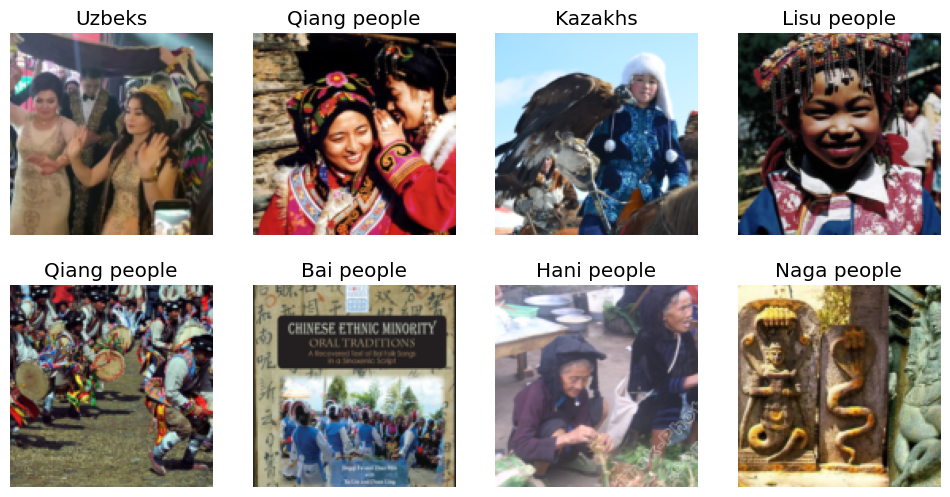

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

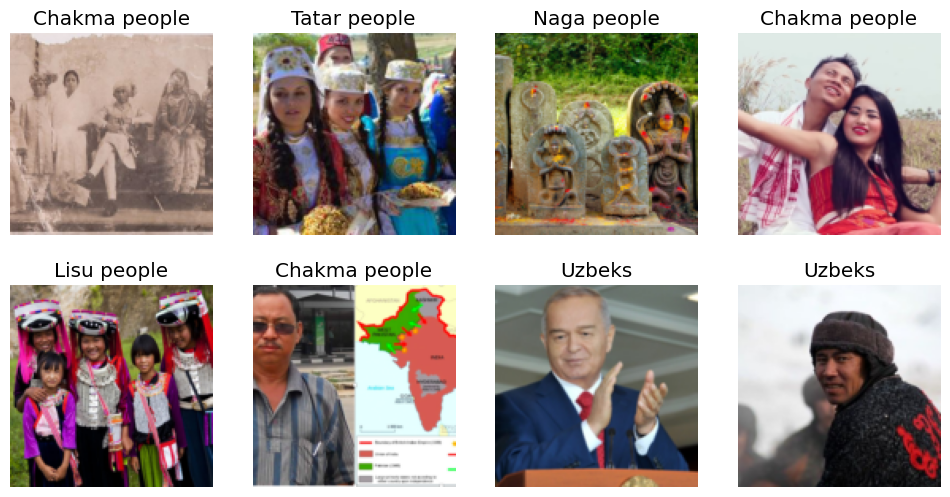

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

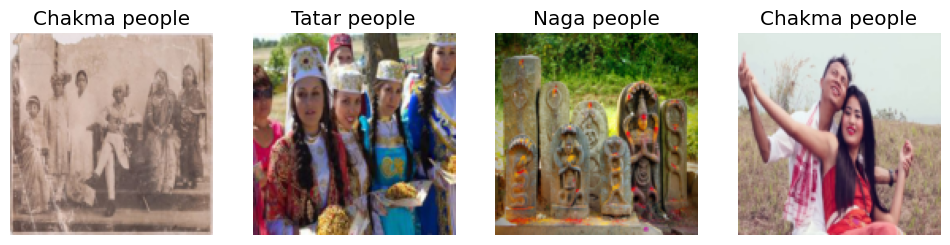

In [ ]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Squish)) # Squishing the whole image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

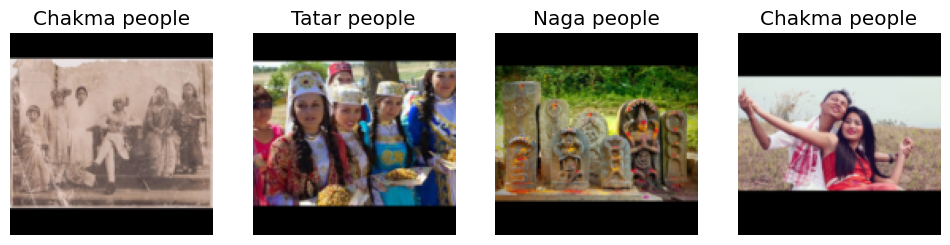

In [ ]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros')) # Padding the extra spaced the whole image into (128 x 128) size without squishing
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

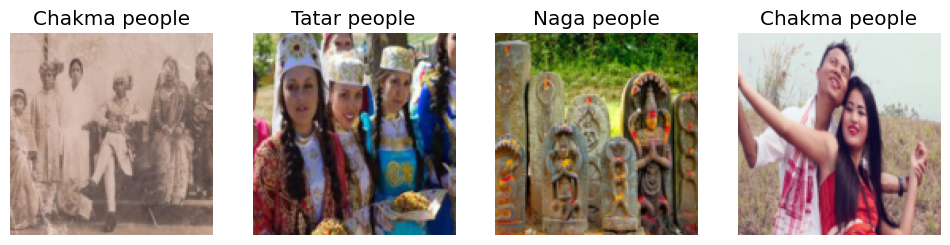

In [ ]:
dblock = dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.3)) # Randomly cropping, cutting, resizing, coloring parts of image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
doc(aug_transforms)

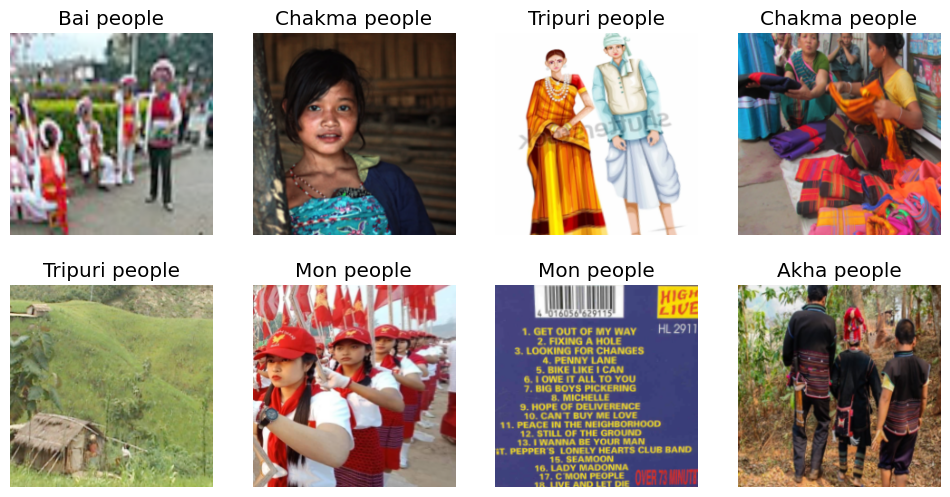

In [ ]:
# RandomResizedCrop crops images randomly and create copies so that we don't miss out anything
# aug_transforms is used for image data augmentation
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path)
dls.train.show_batch(max_n=8, nrows=2)

In [ ]:
torch.save(dls, "ethnic_group_dataloader_v0.pkl")